In [88]:
# Standard imports
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [89]:
if os.name == "nt":
    sys.path.append(r"C:\Geotech_Research\CriticalSoilModels\pumat")
elif os.name == "posix":
    sys.path.append(r"/mnt/data/the_deep/Geotech_Research/Critical_Soil_Models/pumat")

from lib.Load_Classes.Popular_Load_Class import PopularPath
from lib.Driver_Classes.Mod_Driver_Setup import DriverModelSetup
from lib.Driver_Classes.Mod_Driver_Model import DriverModel
from lib.general_functions.executing_runs import generate_batch_script, run_batch_script

In [90]:
trx_strain = "TriaxialE1"

load_params = {
    "ninc": 100,
    "maxiter": 0,
    "dtime"  : 0,
    "every"  : 10,
    "ddstran_1": -0.2,
}


load = PopularPath(trx_strain, load_params)

In [91]:
# This needs to be in the order that the parameters should be in

properties = {
    "Init Shear Modulus" : 2500,
    "poisson ratio"      : 0.2,
    "M_tc"               : 1,
    "Nova's N"           : 0.0,
    "D_min"              : 0.0,
    "h"                  : 0.0,
    "alpha_G"            : 0.0, 
    "alpha_K"            : 0.0,
    "alpha_D"            : 0.0,
    "D_part"             : 0.0, # zero for substepping, 1 for Ortiz-Simo
    "G_s"                : 0.0,
    "ref_rate"           : 0.0,
    "switch_smooth"      : 0.0, # minimum pseudo time step for sloan integration
    "Num smoothing"      : 0.0,
    "switch original"    : 0.0,
    "FTOl"               : 1e-8,
    "max stress iters"   : 1000
}

In [92]:
len(properties)

17

In [93]:
# Get the name of the current folder
current_working_dir = os.getcwd()

# Path to the folder that the Ortiz-Simo data should be stored in
folder_1 = os.path.join(current_working_dir, "strain_rate_1")

if os.name == "nt":
    # On windows
    # pATH FOR
    exe_path = r"C:\Geotech_Research\CriticalSoilModels\Strain_Rate_Mohr_Coulomb_old\build\gfortran_E167FD2A985B468F\app\SRMC_incrementalDriver.exe"
    # exe_path = r"C:\Geotech_Research\Tutorial_Models\Triaxial_Models\Zambrano_Models\mymodel\incrementalDriver.exe"
elif os.name == "posix":
    exe_path = r"/mnt/data/the_deep/Geotech_Research/Critical_Soil_Models/Strain_Rate_Mohr_Coulomb/build/gfortran_E167FD2A985B468F/app/SRMC_incrementalDriver"
# 

In [94]:
# Generate the 
models = [DriverModel(folder_1, "Strain rate 1", exe_path, "output.txt")]



In [95]:
for model in models:
    model.setup.clear_folder()

Deleted: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\initialconditions.inp
Deleted: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\parameters.inp
Deleted: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\test.inp
Deleted: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\run_model.bat
Deleted: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\output.txt


In [96]:
# Set the ortiz simo model
models[0].setup.write_parameters_file(properties)


In [97]:
# Set the stress and state parameters
stress = [-100, -100, -100, 0, 0, 0]
state_params = {"shear modulus"       : 0,
                "bulk modulus"        : 0,
                "Stress ratio"        : 0,
                "Dilatancy"           : 0,
                "Inertial Coeff"      : 0,
                "yielding (1 for yes)": 0,
                "EspP_1"              : 0,
                "EspP_2"              : 0,
                "EspP_3"              : 0,
                "EspP_4"              : 0,
                "EspP_5"              : 0,
                "EspP_6"              : 0,
                "N_i"                 : 0, # Current number of strain rate sums
                "Sum_rate"            : 0  # Current sum of strain rates 
}

for model in models:
    model.setup.write_initial_conditions_file(stress, state_params)
    # Appends the load onto the other stored loads
    model.setup.store_loads(load)
    model.setup.write_loads()

In [98]:
for model in models:
    model.run_model()

Batch file 'c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1\run_model.bat' executed successfully.


In [99]:
for model in models:
    print(model.results)

Output file name: output.txt
Results folder path: c:\Geotech_Research\Tutorial_Models\SRMC_Comparison\Trx_Drained_Strain_Controlled\2_perf_plastic\strain_rate_1



In [100]:
for model in models:
    model.results.store_all()

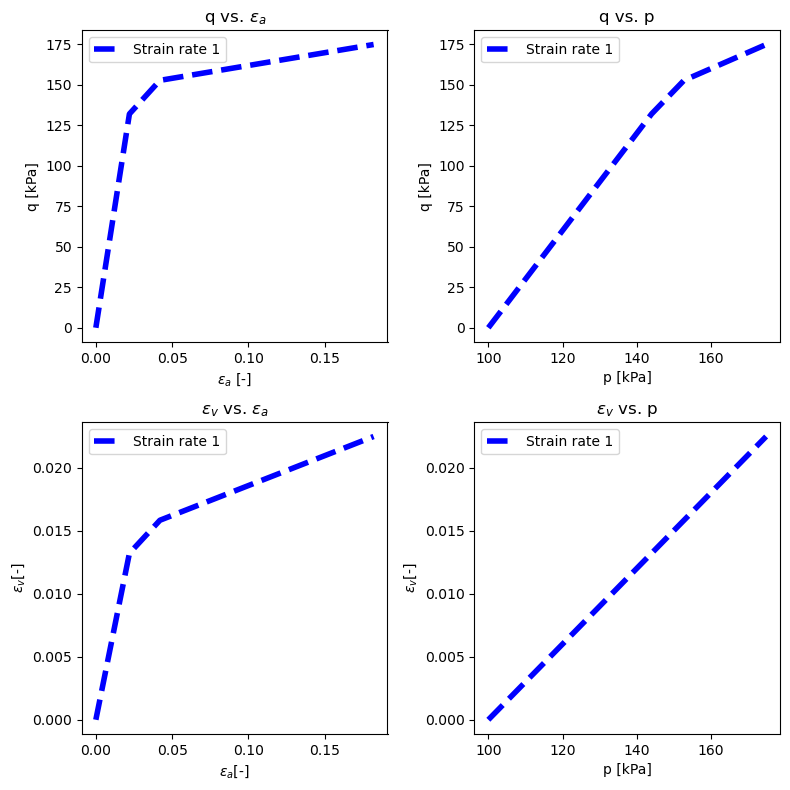

In [101]:
# Generate a figure to plot the MCSS models
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

colors = ["blue", "red"]
labels = ["Strain rate 1"]
styles = ["dashed", "solid"]
line_widths = [4, 1.75]

for model, color, label, style, linewidth in zip(models, colors, labels, styles, line_widths):
    model.results.quick_quad_plot(axial_strain_id="stran(1)", compression_pos=True, axs = axs, 
                                  color = color , label=label, legend = True, linestyle = style, linewidth = linewidth)
    
plt.show()
# fig.savefig("Drained_Strain_Control_linear_elastic.png", format = "png", bbox_inches = 'tight')
plt.close()